# Курсовая работа
 Дворецкий Никита Сергеевич М8О-109СВ-24
 
### Название: Default of Credit Card Clients Dataset

## 1. Описание

### Датасет: 
Этот датасет содержит информацию о клиентах кредитных карт в Тайване и их истории платежей. Он используется для прогнозирования вероятности дефолта клиентов. Вот основные характеристики датасета:
- Количество экземпляров: 30,000
- Количество признаков: 23
- Тип признаков: Целые числа и вещественные числа
### Поля: 
1. ID - id каждого клиента
2. LIMIT_BALL - размер выданного кредита в долларах
3. SEX - пол клиента (1 - мужчина, 2 - женщина)
4. EDUCATION - уровень образования клиента (1 - основное общее, 2 - высшее, 3 - среднее общее, 4 - другое, 5 - неизвестно, 6 - неизвестно)
5. MARRIAGE - семейное положение (1 - женат/замужем, 2 - одинок(а), 3 - другое)
6. AGE - возраст клиента, полных лет
7. PAY_0 - Статус погашения в сентябре 2005 г. (-1 = оплата своевременно, 1 = задержка платежа на один месяц, 2 = задержка платежа на два месяца, … 8 = задержка платежа на восемь месяцев, 9 = задержка платежа на девять месяцев и выше)
8. PAY_2 - Статус погашения в августе 2005 г. (шкала такая же, как указано выше)
9. PAY_3 - Статус погашения в июле 2005 г. (шкала такая же, как указано выше)
10. PAY_4 -Статус погашения в июне 2005 г. (шкала такая же, как указано выше) 
10. PAY_5 - Статус погашения в мае 2005 г. (шкала такая же, как указано выше)
10. PAY_6 - Статус погашения в апреле 2005 г. (шкала такая же, как указано выше)
13. BILL_AMT1 - Сумма векселей в сентябре 2005 г. (н.долл.)
13. BILL_AMT2 - Сумма векселей в августе 2005 г. (н.долл.)
13. BILL_AMT3 - Сумма векселей в июле 2005 г. (н.долл.)
13. BILL_AMT4 - Сумма векселей в июне 2005 г. (н.долл.)
13. BILL_AMT5 - Сумма векселей в мае 2005 г. (н.долл.)
13. BILL_AMT6 - Сумма векселей в апреле 2005 г. (н.долл.)
19. PAY_AMT1 - Сумма предыдущего платежа в сентябре 2005 г. (н.дол. США)
19. PAY_AMT2 - Сумма предыдущего платежа в августе 2005 г. (н.дол. США)
19. PAY_AMT3 - Сумма предыдущего платежа в июле 2005 г. (н.дол. США)
19. PAY_AMT4 - Сумма предыдущего платежа в июне 2005 г. (н.дол. США)
19. PAY_AMT5 - Сумма предыдущего платежа в мае 2005 г. (н.дол. США)
19. PAY_AMT6 - Сумма предыдущего платежа в апреле 2005 г. (н.дол. США)
25. target - целевая переменная, произошел ли дефолт (1- да, 0 - нет)

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from statsmodels.api import OLS, add_constant, Logit, Probit
import xgboost as xgb
from sklearn.ensemble import RandomForestClassifier
import lightgbm as lgb

import warnings
warnings.filterwarnings('ignore')

In [7]:
from sklearn.linear_model import RidgeClassifier, LogisticRegression
from sklearn.preprocessing import StandardScaler, MinMaxScaler, TargetEncoder, OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, roc_auc_score, f1_score

## 2. Dataset loader

In [8]:
from google_drive_downloader import GoogleDriveDownloader as gdd

class dataset_loader():

    def __init__(self):
        pass
    
    def read_csv(self, filepath):
        def download_csv():

            gdd.download_file_from_google_drive(file_id='19jz4yyX-S-p6VP4BSkZUXKbU65WZLPCe',
                                                dest_path='./dataset.zip',
                                                unzip=True)
            return True
        download_csv()
        df = pd.read_csv(filepath)
        return df

loader = dataset_loader()
df = loader.read_csv('UCI_Credit_Card.csv')
df = df.rename({df.columns[-1]: 'target'}, axis = 1)

df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,target
0,1,20000.0,2,2,1,24,2,2,-1,-1,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,2,120000.0,2,2,2,26,-1,2,0,0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,3,90000.0,2,2,2,34,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,4,50000.0,2,2,1,37,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,5,50000.0,1,2,1,57,-1,0,-1,0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0


In [7]:
df.sample(10)

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,target
9000,9001,50000.0,1,3,2,36,0,0,0,0,...,0.0,0.0,0.0,2166.0,1000.0,0.0,0.0,0.0,0.0,0
11708,11709,20000.0,1,2,2,25,0,0,2,2,...,18983.0,18540.0,19775.0,3200.0,800.0,900.0,0.0,1700.0,0.0,0
7159,7160,150000.0,2,1,2,35,-2,-2,-2,-2,...,8295.0,7301.0,4388.0,14021.0,7723.0,8295.0,7301.0,4388.0,1600.0,0
17474,17475,180000.0,2,1,1,46,-1,-1,-1,-1,...,11926.0,9718.0,34322.0,16359.0,14293.0,11949.0,9737.0,34449.0,25691.0,0
16445,16446,80000.0,2,3,2,50,0,0,0,0,...,47620.0,48571.0,48525.0,1754.0,2210.0,1700.0,1614.0,1600.0,1600.0,0
726,727,360000.0,2,2,2,39,-1,-1,-1,0,...,8894.0,5329.0,998.0,4484.0,19623.0,222.0,5355.0,998.0,9004.0,0
12710,12711,50000.0,1,2,2,38,0,0,0,0,...,17833.0,18246.0,18642.0,1300.0,1600.0,650.0,700.0,700.0,700.0,0
15814,15815,30000.0,2,2,1,27,-1,-1,2,-1,...,780.0,390.0,390.0,780.0,0.0,780.0,0.0,390.0,150.0,0
19780,19781,400000.0,2,2,1,45,-2,-2,-1,-1,...,2483.0,10719.0,1722.0,2441.0,16046.0,2483.0,10719.0,1722.0,2836.0,0
8904,8905,110000.0,1,2,1,34,0,0,0,0,...,100512.0,102215.0,103909.0,4600.0,4000.0,4000.0,3800.0,4000.0,4000.0,0


## 3. Статистика

### Размер датафрейма

In [8]:
print(f'Общее кол-во строк: {df.shape[0]}\nОбщее кол-во полей: {df.shape[1]}\nОбщий объем данных: {df.size}')

Общее кол-во строк: 30000
Общее кол-во полей: 25
Общий объем данных: 750000


### Типы данных

In [9]:
df.dtypes

ID             int64
LIMIT_BAL    float64
SEX            int64
EDUCATION      int64
MARRIAGE       int64
AGE            int64
PAY_0          int64
PAY_2          int64
PAY_3          int64
PAY_4          int64
PAY_5          int64
PAY_6          int64
BILL_AMT1    float64
BILL_AMT2    float64
BILL_AMT3    float64
BILL_AMT4    float64
BILL_AMT5    float64
BILL_AMT6    float64
PAY_AMT1     float64
PAY_AMT2     float64
PAY_AMT3     float64
PAY_AMT4     float64
PAY_AMT5     float64
PAY_AMT6     float64
target         int64
dtype: object

### Количество пропусков

In [10]:
print("\nMissing values in each column:")
print(df.isnull().sum())


Missing values in each column:
ID           0
LIMIT_BAL    0
SEX          0
EDUCATION    0
MARRIAGE     0
AGE          0
PAY_0        0
PAY_2        0
PAY_3        0
PAY_4        0
PAY_5        0
PAY_6        0
BILL_AMT1    0
BILL_AMT2    0
BILL_AMT3    0
BILL_AMT4    0
BILL_AMT5    0
BILL_AMT6    0
PAY_AMT1     0
PAY_AMT2     0
PAY_AMT3     0
PAY_AMT4     0
PAY_AMT5     0
PAY_AMT6     0
target       0
dtype: int64


Пропусков нет.

### Описание математических характеристик всех столбцов

In [11]:
df.describe()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,target
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,...,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.00000,30000.000000,30000.000000,30000.000000,30000.000000
mean,15000.500000,167484.322667,1.603733,1.853133,1.551867,35.485500,-0.016700,-0.133767,-0.166200,-0.220667,...,43262.948967,40311.400967,38871.760400,5663.580500,5.921163e+03,5225.68150,4826.076867,4799.387633,5215.502567,0.221200
std,8660.398374,129747.661567,0.489129,0.790349,0.521970,9.217904,1.123802,1.197186,1.196868,1.169139,...,64332.856134,60797.155770,59554.107537,16563.280354,2.304087e+04,17606.96147,15666.159744,15278.305679,17777.465775,0.415062
min,1.000000,10000.000000,1.000000,0.000000,0.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,...,-170000.000000,-81334.000000,-339603.000000,0.000000,0.000000e+00,0.00000,0.000000,0.000000,0.000000,0.000000
25%,7500.750000,50000.000000,1.000000,1.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,2326.750000,1763.000000,1256.000000,1000.000000,8.330000e+02,390.00000,296.000000,252.500000,117.750000,0.000000
50%,15000.500000,140000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,...,19052.000000,18104.500000,17071.000000,2100.000000,2.009000e+03,1800.00000,1500.000000,1500.000000,1500.000000,0.000000
75%,22500.250000,240000.000000,2.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,...,54506.000000,50190.500000,49198.250000,5006.000000,5.000000e+03,4505.00000,4013.250000,4031.500000,4000.000000,0.000000
max,30000.000000,1000000.000000,2.000000,6.000000,3.000000,79.000000,8.000000,8.000000,8.000000,8.000000,...,891586.000000,927171.000000,961664.000000,873552.000000,1.684259e+06,896040.00000,621000.000000,426529.000000,528666.000000,1.000000


In [12]:
# Описание категориальных переменных
df[['SEX', 'EDUCATION', 'MARRIAGE']].describe()

,SEX,EDUCATION,MARRIAGE
count,30000.000000,30000.000000,30000.000000
mean,1.603733,1.853133,1.551867
std,0.489129,0.790349,0.521970
min,1.000000,0.000000,0.000000
25%,1.000000,1.000000,1.000000
50%,2.000000,2.000000,2.000000
75%,2.000000,2.000000,2.000000
max,2.000000,6.000000,3.000000


In [13]:
# Описание задержки платежа
df[['PAY_0', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6']].describe()

,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000
mean,-0.016700,-0.133767,-0.166200,-0.220667,-0.266200,-0.291100
std,1.123802,1.197186,1.196868,1.169139,1.133187,1.149988
min,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000
25%,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000


In [14]:
# Описание выписки по счету
df[['BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6']].describe()

,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6
count,30000.000000,30000.000000,3.000000e+04,30000.000000,30000.000000,30000.000000
mean,51223.330900,49179.075167,4.701315e+04,43262.948967,40311.400967,38871.760400
std,73635.860576,71173.768783,6.934939e+04,64332.856134,60797.155770,59554.107537
min,-165580.000000,-69777.000000,-1.572640e+05,-170000.000000,-81334.000000,-339603.000000
25%,3558.750000,2984.750000,2.666250e+03,2326.750000,1763.000000,1256.000000
50%,22381.500000,21200.000000,2.008850e+04,19052.000000,18104.500000,17071.000000
75%,67091.000000,64006.250000,6.016475e+04,54506.000000,50190.500000,49198.250000
max,964511.000000,983931.000000,1.664089e+06,891586.000000,927171.000000,961664.000000


In [15]:
# Описание предыдущего платежа
df[['PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6']].describe()

,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
count,30000.000000,3.000000e+04,30000.00000,30000.000000,30000.000000,30000.000000
mean,5663.580500,5.921163e+03,5225.68150,4826.076867,4799.387633,5215.502567
std,16563.280354,2.304087e+04,17606.96147,15666.159744,15278.305679,17777.465775
min,0.000000,0.000000e+00,0.00000,0.000000,0.000000,0.000000
25%,1000.000000,8.330000e+02,390.00000,296.000000,252.500000,117.750000
50%,2100.000000,2.009000e+03,1800.00000,1500.000000,1500.000000,1500.000000
75%,5006.000000,5.000000e+03,4505.00000,4013.250000,4031.500000,4000.000000
max,873552.000000,1.684259e+06,896040.00000,621000.000000,426529.000000,528666.000000


Проверим несбалансированность данных по отношению к целевому значению, то есть default.paying.next.month.

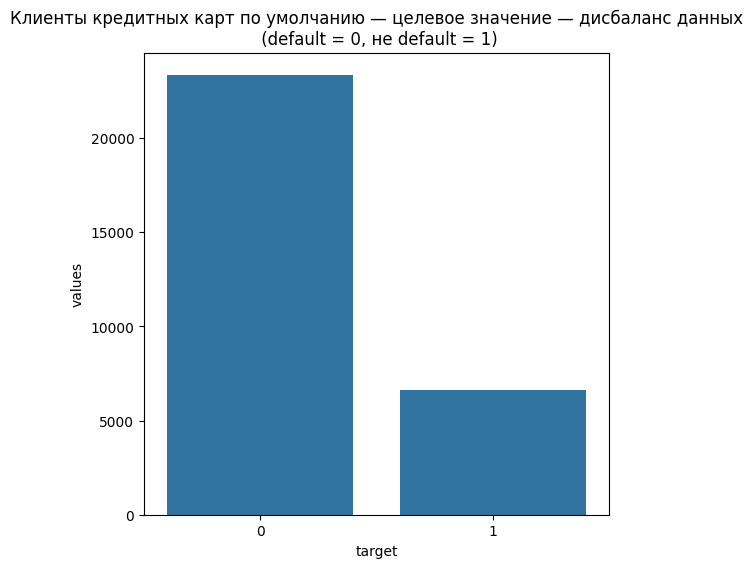

In [16]:
temp = df.target.value_counts()
plt.figure(figsize = (6,6))
plt.title('Клиенты кредитных карт по умолчанию — целевое значение — дисбаланс данных\n (default = 0, не default = 1)')
sns.set_color_codes("pastel")
sns.barplot(x = 'target', y="values", data=pd.DataFrame({'target': temp.index,'values': temp.values}))
locs, labels = plt.xticks()
plt.show()

6636 из 30 000 (или 22%) клиентов объявят дефолт в следующем месяце. <br> Данные не имеют большого дисбаланса по отношению к целевому значению (default.paying.next.month).

In [17]:
df.LIMIT_BAL.describe()

count      30000.000000
mean      167484.322667
std       129747.661567
min        10000.000000
25%        50000.000000
50%       140000.000000
75%       240000.000000
max      1000000.000000
Name: LIMIT_BAL, dtype: float64

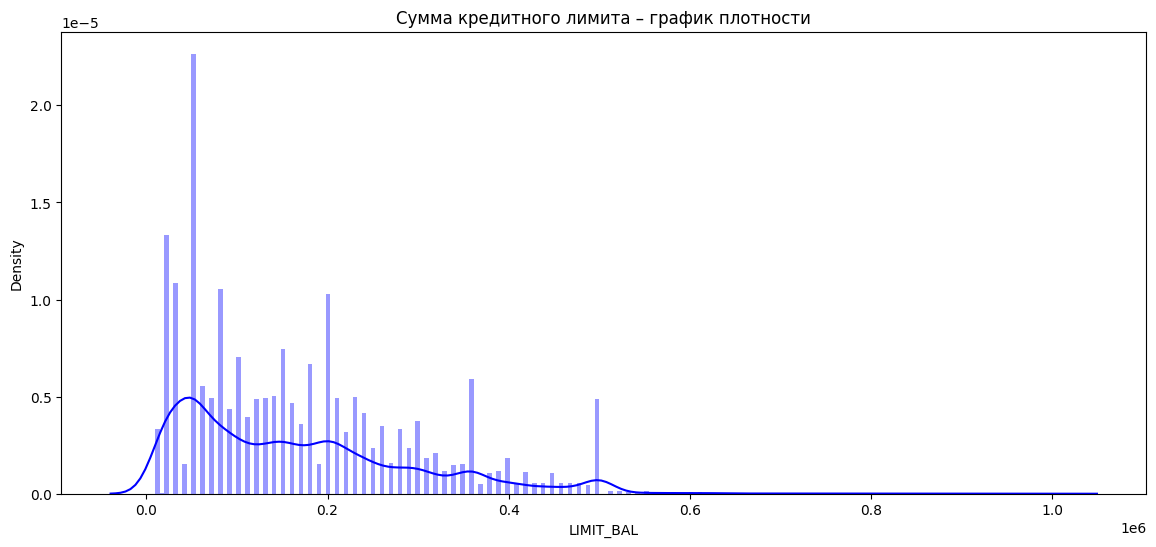

In [18]:
plt.figure(figsize = (14,6))
plt.title('Сумма кредитного лимита – график плотности')
sns.set_color_codes("pastel")
sns.distplot(df['LIMIT_BAL'],kde=True,bins=200, color="blue")
plt.show()

In [19]:
var =['LIMIT_BAL']
df[var].value_counts().head(5)

LIMIT_BAL
50000.0      3365
20000.0      1976
30000.0      1610
80000.0      1567
200000.0     1528
Name: count, dtype: int64

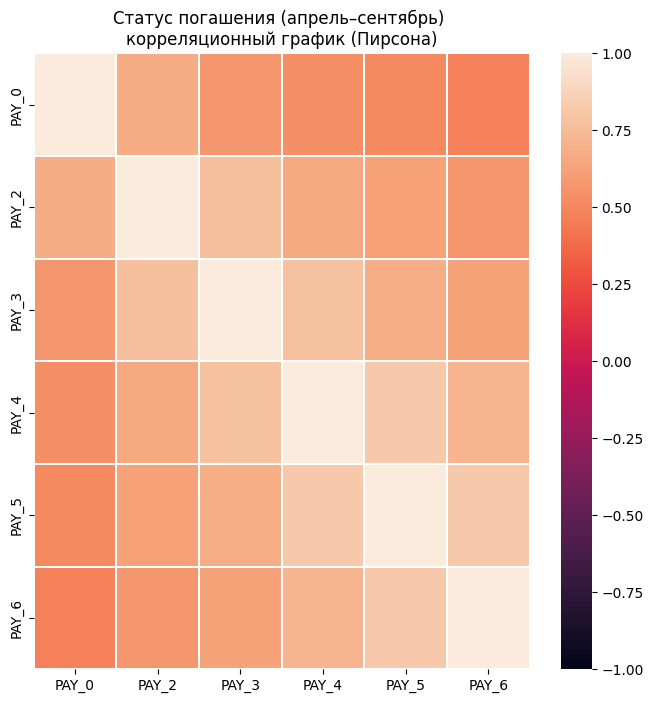

In [20]:
var = ['PAY_0','PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6']

plt.figure(figsize = (8,8))
plt.title('Статус погашения (апрель–сентябрь) \nкорреляционный график (Пирсона)')
corr = df[var].corr()
sns.heatmap(corr,xticklabels=corr.columns,yticklabels=corr.columns,linewidths=.1,vmin=-1, vmax=1)
plt.show()

## 4. Алгоритм 

<b>В нашем случае решается задача классификации</b>

### Разбиение данных на тестовую и обучающую выборку

In [21]:
train_df, val_df = train_test_split(df, test_size=0.2, random_state=2024, shuffle=True )

### Подготовка к обучению
Здесь мы устанавливаем несколько параметров для анализа и моделей.

In [22]:
target = 'target'
predictors = [  'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 
                'PAY_0', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 
                'BILL_AMT1','BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6',
                'PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6']

RFC_METRIC = 'gini'  # метрика, используемая для RandomForrestClassifier
NUM_ESTIMATORS = 100 # количество оценщиков, используемых для RandomForrestClassifier
NO_JOBS = 4 # количество параллельных заданий, используемых для RandomForrestClassifier

#ВАЛИДАЦИЯ
VALID_SIZE = 0.20 # простая проверка с использованием train_test_split

#КРОСС-ВАЛИДАЦИЯ
NUMBER_KFOLDS = 5 # количество KFold для перекрестной проверки

RANDOM_STATE = 2018

MAX_ROUNDS = 1000 # XGB итераций 
EARLY_STOP = 50 # XGB ранний стоп
OPT_ROUNDS = 1000  # Будет скорректировано на основе лучших раундов проверки
VERBOSE_EVAL = 50 # Распечатать результат метрики


## XGBoost
XGBoost — алгоритм повышения градиента.

Подготовим модель.

Подготовьте модель. Мы инициализируем объекты DMatrix для обучения и проверки, начиная с наборов данных. Мы также установили некоторые параметры, используемые для настройки модели.

In [23]:
# Подготовим поезд и действительные наборы данных
dtrain = xgb.DMatrix(train_df[predictors], train_df[target].values)
dvalid = xgb.DMatrix(val_df[predictors], val_df[target].values)

#Что отслеживать (в данном случае **обучаться** и **действительно**)
watchlist = [(dtrain, 'train'), (dvalid, 'valid')]

# Установим параметры xgboost
params = {}
params['objective'] = 'binary:logistic'
params['eta'] = 0.039
params['silent'] = True
params['max_depth'] = 10
params['subsample'] = 0.8
params['colsample_bytree'] = 0.5
params['eval_metric'] = 'auc'
params['random_state'] = RANDOM_STATE

## Тренировка модели

In [24]:
model = xgb.train(params, 
                dtrain, 
                MAX_ROUNDS, 
                watchlist, 
                early_stopping_rounds=EARLY_STOP, 
                maximize=True, 
                verbose_eval=VERBOSE_EVAL)

[0]	train-auc:0.78005	valid-auc:0.69813
[50]	train-auc:0.89370	valid-auc:0.77397
[100]	train-auc:0.92873	valid-auc:0.77472
[150]	train-auc:0.94980	valid-auc:0.77394
[153]	train-auc:0.95055	valid-auc:0.77371


### RandomForestClassifier
Запустим модель, используя обучающий набор для обучения. Затем мы будем использовать набор проверки для проверки.

### Метрика
В качестве критерия проверки мы будем использовать GINI, формула которого: GINI = 2 * (AUC) - 1, где AUC — рабочая характеристика приемника — площадь под кривой (ROC-AUC). Количество оценщиков установлено на 100, а количество параллельных заданий — на 4.

In [25]:
clf = RandomForestClassifier(n_jobs=NO_JOBS, 
                             random_state=RANDOM_STATE,
                             criterion=RFC_METRIC,
                             n_estimators=NUM_ESTIMATORS,
                             verbose=False)

Обучим RandonForestClassifier, используя данные train_df и функцию fit.

In [26]:
clf.fit(train_df[predictors], train_df[target].values)

RandomForestClassifier(n_jobs=4, random_state=2018, verbose=False)

Теперь спрогнозируем целевые значения для данных val_df, используя функцию прогнозирования.

In [27]:
preds = clf.predict(val_df[predictors])

Визуализируем важность функций.

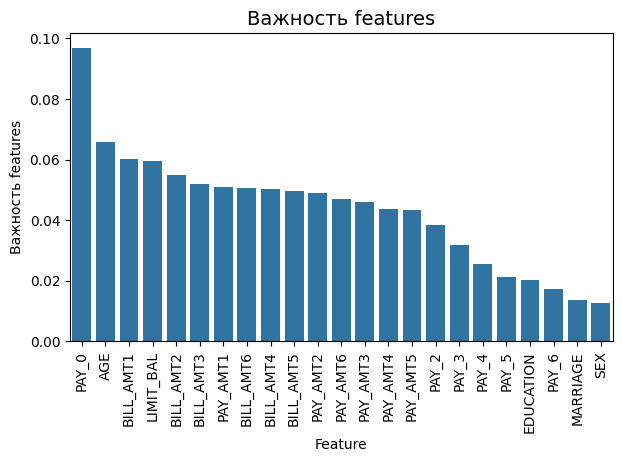

In [28]:
tmp = pd.DataFrame({'Feature': predictors, 'Важность features': clf.feature_importances_})
tmp = tmp.sort_values(by='Важность features',ascending=False)
plt.figure(figsize = (7,4))
plt.title('Важность features',fontsize=14)
s = sns.barplot(x='Feature',y='Важность features',data=tmp)
s.set_xticklabels(s.get_xticklabels(),rotation=90)
plt.show() 

Наиболее важными функциями являются PAY_0, AGE, BILL_AMT1, LIMIT_BAL, BILL_AMT2, BILL_AMT3.

### Матрица путаницы
Покажем матрицу путаницы(confusion matrix) для полученных результатов.

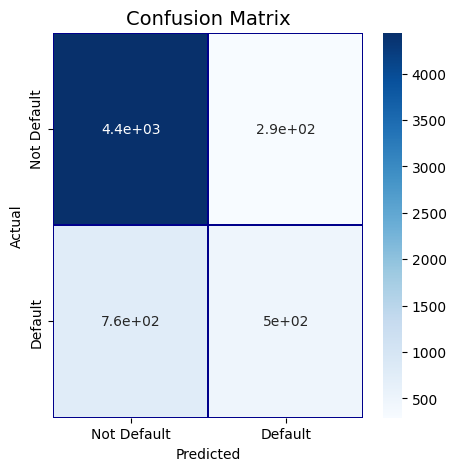

In [29]:
cm = pd.crosstab(val_df[target].values, preds, rownames=['Actual'], colnames=['Predicted'])
fig, (ax1) = plt.subplots(ncols=1, figsize=(5,5))
sns.heatmap(cm, 
            xticklabels=['Not Default', 'Default'],
            yticklabels=['Not Default', 'Default'],
            annot=True,ax=ax1,
            linewidths=.2,linecolor="Darkblue", cmap="Blues")
plt.title('Confusion Matrix', fontsize=14) # Матрица путаницы
plt.show()

Мы также рассчитываем площадь под кривой (характеристику оператора приемника).

In [30]:
roc_auc_score(val_df[target].values, preds)

np.float64(0.6670265719199819)

Оценка ROC-AUC, полученная с помощью AdaBoostClassifier, равна 0,67.

## 5. Кластеризация 

In [31]:
exog_features = ['SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'LIMIT_BAL', 'PAY_AMT1']

exog = df[exog_features]

endog = df['target']

ols_reg = OLS(endog=endog, exog=add_constant(exog)).fit(cov_type='HC0')

print(ols_reg.summary2())

                  Results: Ordinary least squares
Model:              OLS              Adj. R-squared:     0.029     
Dependent Variable: target           AIC:                31504.3081
Date:               2024-12-22 22:50 BIC:                31562.4707
No. Observations:   30000            Log-Likelihood:     -15745.   
Df Model:           6                F-statistic:        165.8     
Df Residuals:       29993            Prob (F-statistic): 3.73e-208 
R-squared:          0.029            Scale:              0.16730   
--------------------------------------------------------------------
                Coef.   Std.Err.     z      P>|z|    [0.025   0.975]
--------------------------------------------------------------------
const           0.3816    0.0192   19.8850  0.0000   0.3440   0.4192
SEX            -0.0297    0.0049   -6.0436  0.0000  -0.0393  -0.0201
EDUCATION      -0.0084    0.0030   -2.8470  0.0044  -0.0142  -0.0026
MARRIAGE       -0.0282    0.0051   -5.5818  0.0000  -0.0381 

Из параметра P, можно понять, насколько сильно влияет параметр на наше исследование, если он больше 1%, то его можно убарть.

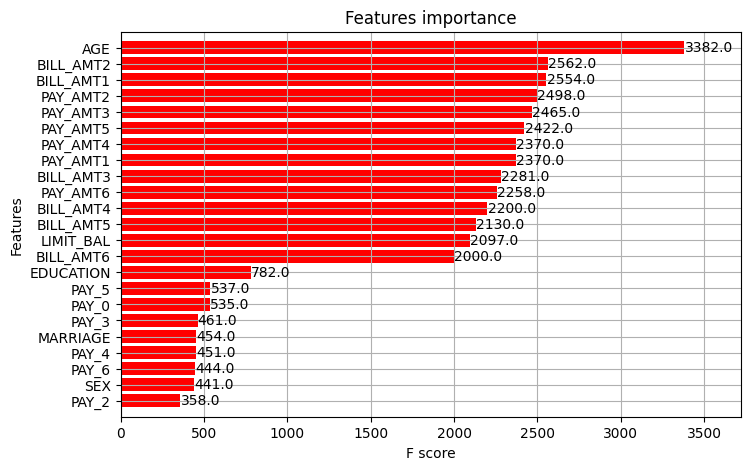

In [33]:
fig, (ax) = plt.subplots(ncols=1, figsize=(8,5))
xgb.plot_importance(model, height=0.8, title="Features importance", ax=ax,color="red") 
plt.show()

По этой гистограмме можно понять, что на дефолтность почти не влияют многие параметры.

## 6. ML-systems design

### Примеры использования датасета в продакшн системах
- Банки и кредитные компании: Для оценки риска дефолта клиентов и принятия решений о выдаче кредитов.
- Финансовые технологические компании: Для создания инструментов анализа кредитного риска и предложений по управлению долгами.
- Стартапы в сфере финансовых услуг: Для разработки новых продуктов и услуг, связанных с кредитными картами и кредитованием.
### Преимущества датасета
- Разнообразие данных: Включает множество признаков, таких как уровень образования, семейное положение, история платежей и т.д.
- Реальные данные: Используемые данные основаны на реальных случаях дефолта клиентов.
- Высокая точность: Данные помогают создавать точные модели для прогнозирования дефолта.
### Недостатки датасета
- Ограниченность географии: Данные собраны только в Тайване, что может ограничить обобщение результатов на другие регионы.
- Статичность данных: Данные относятся к определенному временному периоду (2005 год), что может снизить актуальность моделей.
- Проблемы с приватностью: Использование финансовых данных требует соблюдения строгих мер по защите данных.